# Исследование объявлений о продаже квартир

In [52]:
from IPython.display import display, HTML

toc_html = """
<div style="font-family: Arial, sans-serif; line-height: 1.6;">
<h1 style="color: #2e86c1; border-bottom: 2px solid #2e86c1; padding-bottom: 10px;">Оглавление проекта</h1>

<div style="margin-left: 15px;">
    <h2 style="color: #2874a6;"><a href="#section1" style="text-decoration: none; color: inherit;">1. Введение</a></h2>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section1-1" style="color: #3498db;">• Описание проекта и цели исследования</a></li>
        <li><a href="#section1-2" style="color: #3498db;">• Обзор данных (источник, структура, ключевые параметры)</a></li>
    </ul>

    <h2 style="color: #2874a6;"><a href="#section2" style="text-decoration: none; color: inherit;">2. Загрузка и первичный анализ данных</a></h2>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section2-1" style="color: #3498db;">• Импорт библиотек (pandas, matplotlib, seaborn)</a></li>
        <li><a href="#section2-2" style="color: #3498db;">• Загрузка данных</a></li>
        <li><a href="#section2-3" style="color: #3498db;">• Общая информация</a></li>
        <li><a href="#section2-4" style="color: #3498db;">• Визуализация</a></li>
    </ul>

    <h2 style="color: #2874a6;"><a href="#section3" style="text-decoration: none; color: inherit;">3. Предобработка данных</a></h2>
    <p style="margin-left: 20px; margin-bottom: 5px; font-weight: bold;">Пропущенные значения:</p>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section3-1" style="color: #3498db;">• Анализ пропусков</a></li>
        <li><a href="#section3-2" style="color: #3498db;">• Заполнение/удаление</a></li>
    </ul>
    <p style="margin-left: 20px; margin-bottom: 5px; font-weight: bold;">Типы данных:</p>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section3-3" style="color: #3498db;">• Корректировка типов</a></li>
    </ul>
    <p style="margin-left: 20px; margin-bottom: 5px; font-weight: bold;">Устранение дубликатов:</p>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section3-4" style="color: #3498db;">• Нормализация названий населённых пунктов</a></li>
    </ul>

    <h2 style="color: #2874a6;"><a href="#section4" style="text-decoration: none; color: inherit;">4. Добавление новых признаков</a></h2>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section4-1" style="color: #3498db;">• Цена за кв.м: price_per_sqm = last_price / total_area</a></li>
        <li><a href="#section4-2" style="color: #3498db;">• Дата публикации</a></li>
        <li><a href="#section4-3" style="color: #3498db;">• Тип этажа</a></li>
        <li><a href="#section4-4" style="color: #3498db;">• Расстояние до центра в км</a></li>
    </ul>

    <h2 style="color: #2874a6;"><a href="#section5" style="text-decoration: none; color: inherit;">5. Исследовательский анализ данных (EDA)</a></h2>
    <p style="margin-left: 20px; margin-bottom: 5px; font-weight: bold;">Анализ распределения параметров:</p>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section5-1" style="color: #3498db;">• Гистограммы</a></li>
    </ul>
    <p style="margin-left: 20px; margin-bottom: 5px; font-weight: bold;">Анализ по локациям:</p>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section5-2" style="color: #3498db;">• Топ-10 населённых пунктов по числу объявлений</a></li>
        <li><a href="#section5-3" style="color: #3498db;">• Средняя цена кв.м, выделение мин/макс</a></li>
        <li><a href="#section5-4" style="color: #3498db;">• Зависимость цены от удалённости от центра СПб</a></li>
    </ul>

    <h2 style="color: #2874a6;"><a href="#section6" style="text-decoration: none; color: inherit;">6. Выводы</a></h2>
    <ul style="list-style-type: circle; margin-top: 5px;">
        <li><a href="#section6-1" style="color: #3498db;">• Ключевые факторы, влияющие на цену</a></li>
    </ul>
</div>

<style>
    a:hover {
        text-decoration: underline !important;
        color: #1b4f72 !important;
    }
    h2 {
        margin-top: 20px;
        margin-bottom: 10px;
    }
    ul {
        margin-bottom: 10px;
    }
</style>
</div>
"""

display(HTML(toc_html))

## Введение

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Путь к файлу: /datasets/real_estate_data.csv    
      
Описание данных:    
  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

## Загрузка и первичный анализ данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#Загрузка бибилиотек

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(5)
#Чтение файла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()#Выводим основную информацию о дф

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

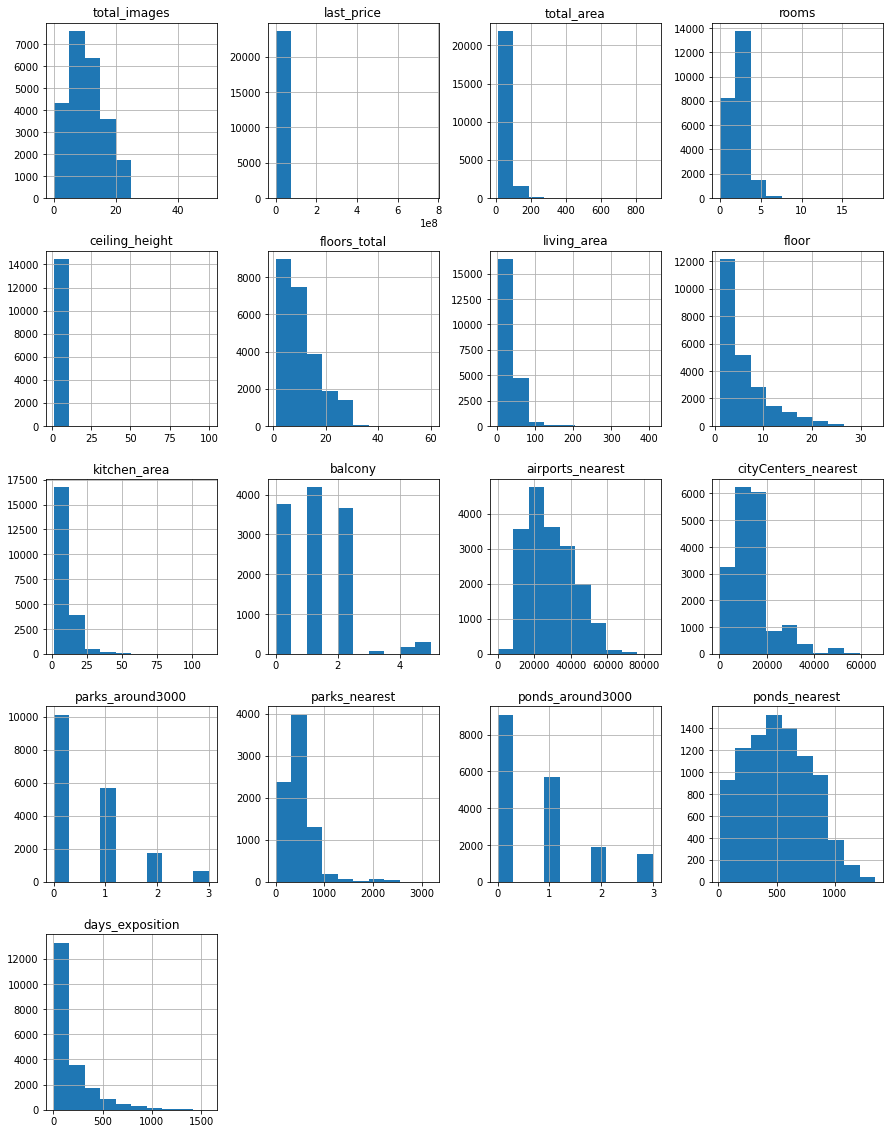

In [4]:
data.hist(figsize=(15, 20));#строю гистограммы

**Промежуточный вывод**  
1)В датафрейме 23699 записей.     
2)Во многих столбцах стоят пропущенные значения, которые предстоит предобработать.  
3)В столбцах с датой и временем стоит некорректный тип данных.   
4)Аномалии в гистограммах, они могут негативно повлиять на наши выводы. 

## Предобработка данных

Ищем пропуски, дубликаты, правим тип данных

In [5]:
data.isna().sum()#Проверка на пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data123=data['total_area'].mean()/data['kitchen_area'].mean()
#соотношение средней общей площади к средней куханной площади
data123

5.709531864143031

In [7]:
data456=data['total_area'].mean()/data['living_area'].mean()
#соотношение средней общей площади к средней жилой площади
data456

1.751375861996321

In [8]:
data['is_apartment']=data['is_apartment'].fillna(value=False)
data['balcony']=data['balcony'].fillna(value=0)
data['kitchen_area']=data['kitchen_area'].fillna(value=6.58)
data['living_area']=data['living_area'].fillna(value=1.77)
#заполнение пропусков
data.isna().sum()
#повторная проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data[{'ceiling_height','floors_total','living_area','days_exposition'}].median()
#поиск медианы для столбцов 'ceiling_height','floors_total','living_area','days_exposition'

days_exposition    95.00
ceiling_height      2.65
floors_total        9.00
living_area        29.00
dtype: float64

In [10]:
data['floors_total']=data['floors_total'].fillna(value= 9.00)
data['ceiling_height']=data['ceiling_height'].fillna(value= 2.65)
#заполнение пропусков мединанными значениями
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,1.77,9,False,False,False,6.58,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
data.isna().sum()
#повторная проверка на пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

К пропускам в данных могли привести:  
          1)некорректная загрузка данных  
          2)некорректная выгрузка данных  
          3)недобросоветсное заполнение данных пользователями

In [12]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['is_apartment']=pd.to_numeric(data['is_apartment'])
data['last_price']=data['last_price'].astype('float32')
data['total_area']=data['total_area'].astype('float32')
data['ceiling_height']=data['ceiling_height'].astype('float32')
data['floors_total']=data['floors_total'].astype('float32')
data['living_area']=data['living_area'].astype('float32')
data['kitchen_area']=data['kitchen_area'].astype('float32')
data['balcony']=data['balcony'].astype('float32')
data['airports_nearest']=data['airports_nearest'].astype('float32')
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('float32')
data['parks_around3000']=data['parks_around3000'].astype('float32')
data['parks_nearest']=data['parks_nearest'].astype('float32')
data['days_exposition']=data['days_exposition'].astype('float32')
#приведение к корректным типам данных
data.info() #проверка на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23699 non-null  float32       
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

Изменить Dtype нужно было для значений даты и времени, так как от их отображения зависят реузьтаты исследования -
(применимые к ним функции и методы). Также для стобца, в котором описывается квартира ли продается или дом, легче применить и использовать категориальную переменную за счёт цифры, нежели оставить с типом object. Также этот метод позволить наиболее эффективно хранить данные.

In [13]:
data['locality_name'].unique()#вывод уникальных хначений по столбцу
data['locality_name']=data['locality_name'].str.lower()#приведение столбцов к нижнему регистру
data['locality_name']=data['locality_name'].str.replace('посёлок','поселок')#замена значений

In [14]:
data['locality_name'].unique()#перепроверка

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [15]:
data['locality_name']=data['locality_name'].replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
#замена значений
data['locality_name'].value_counts()#группировка данных по названиям по убыванию

санкт-петербург                                            15721
поселок мурино                                               556
поселок шушары                                               440
всеволожск                                                   398
пушкин                                                       369
                                                           ...  
садоводческое некоммерческое товарищество лесная поляна        1
деревня чудской бор                                            1
деревня хязельки                                               1
поселок станции корнево                                        1
поселок почап                                                  1
Name: locality_name, Length: 322, dtype: int64

## Добавление новых признаков

Добавление новых столбцов в дф

In [16]:
data['price_per_m']=(data['last_price']/data['total_area']).round(2)
data['day_of_exp']=data['first_day_exposition'].dt.weekday
data['month_of_exp']=data['first_day_exposition'].dt.month
data['year_of_exp']=data['first_day_exposition'].dt.year
#добавление новых столбцов в нужном формате    
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_exp,month_of_exp,year_of_exp
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,1.770000,9,False,False,False,6.58,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [17]:
def floor_name(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']== row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_name_full']=data.apply(floor_name,axis=1)
#делим данные на категории
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_exp,month_of_exp,year_of_exp,floor_name_full
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,1.770000,9,False,False,False,6.58,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,другой
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


In [18]:
data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000).round(0)
#округляем километры
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_exp,month_of_exp,year_of_exp,floor_name_full,cityCenters_nearest_km
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой,16.0
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый,19.0
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой,14.0
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,1.770000,9,False,False,False,6.58,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,другой,7.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Промежуточный вывод**  
Новые столбцы успешно добавлены

## Исследовательский анализ данных (EDA)

In [19]:
data.describe() #выводим точную информацию по значениям всех столбцов

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_exp,month_of_exp,year_of_exp,cityCenters_nearest_km
count,23699.000000,23699.0,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6541548.5,60.348648,2.070636,2.724358,10.667749,31.833057,5.892358,10.186298,0.591080,28793.671875,14191.277344,0.611408,490.804565,0.770255,517.980900,180.888641,9.942166e+04,2.569307,6.400101,2017.367146,14.184818
std,5.682529,10887013.0,35.654083,1.078405,0.988298,6.585961,22.918972,4.885249,5.736286,0.959298,12630.880859,8608.386719,0.802074,342.317993,0.938346,277.720643,219.727982,5.030680e+04,1.789082,3.491561,1.039771,8.616194
min,0.000000,12190.0,12.000000,0.000000,1.000000,1.000000,1.770000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3400000.0,40.000000,1.000000,2.600000,5.000000,17.799999,2.000000,6.580000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4650000.0,52.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6800000.0,69.900002,3.000000,2.700000,16.000000,41.099998,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,763000000.0,900.000000,19.000000,100.000000,60.000000,409.700012,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


Итого:  
-общая площадь - ок;  
-жилая площадь - ок; 
-площадь кухни - ок;  
-цена объект - ок;  
-количество комнат - ок; 
-высота потолков - потолков 100м не бывает;  
-тип этажа квартиры («первый», «последний», «другой»)- ок;  
-общее количество этажей в доме - ок;
-расстояние до центра города в метрах - ок;  
-расстояние до ближайшего парка - смущало нулевое значение, но скорее всего просто нет парка вблизи никакого (или пункта, который классифицировался как парк) 

In [20]:
data['ceiling_height'].unique()#выводим уникальные значения

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [21]:
data.loc[data['ceiling_height']>=20, 'ceiling_height']=data['ceiling_height']/10
#делим на 10 значения стобца, которые больше 20       
data['ceiling_height'].unique()#перепроверяем

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

**Графический анализ**

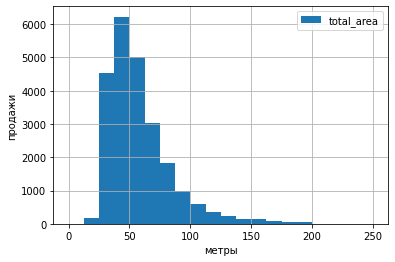

In [22]:
data.query('0 < total_area < 200').plot(y='total_area', kind='hist',bins=20, range=(0,250), grid = True)
#строим гистограмму
plt.xlabel('метры')
plt.ylabel('продажи')
plt.show()

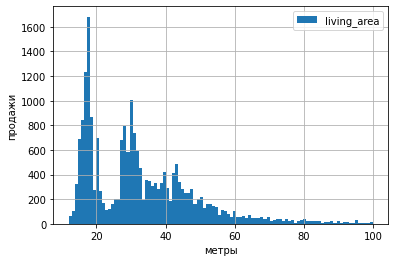

In [23]:
data.plot(y='living_area', kind='hist',bins=100, range=(12,100), grid = True)
#строим гистограмму
plt.xlabel('метры')
plt.ylabel('продажи')
plt.show()

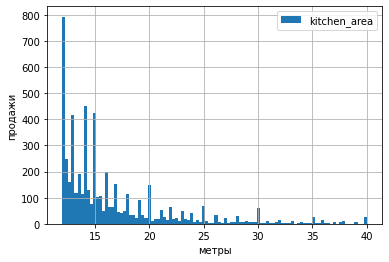

In [24]:
data.plot(y='kitchen_area', kind='hist',bins=100, range=(12,40), grid = True)
#строим гистограмму
plt.xlabel('метры')
plt.ylabel('продажи')
plt.show()

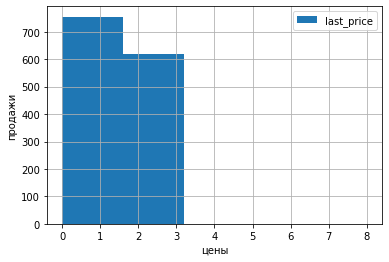

In [25]:
data['last_price']=data['last_price']/1000000
data.query('0 < last_price < 2').plot(y='last_price', kind='hist',bins=5, range=(0,8), grid = True)
#строим гистограмму
plt.xlabel('цены')
plt.ylabel('продажи')
plt.show()

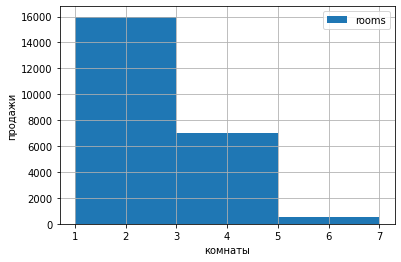

In [26]:
data.query('0 < rooms < 7.5').plot(y='rooms', kind='hist',bins=3, range=(1, 7), grid = True)
#строим гистограмму
plt.xlabel('комнаты')
plt.ylabel('продажи')
plt.show()

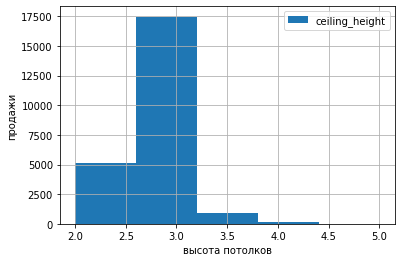

In [27]:
data.query('1 < ceiling_height < 6').plot(y='ceiling_height', kind='hist',bins=5, range=(2,5), grid = True)
#строим гистограмму
plt.xlabel('высота потолков')
plt.ylabel('продажи')
plt.show()

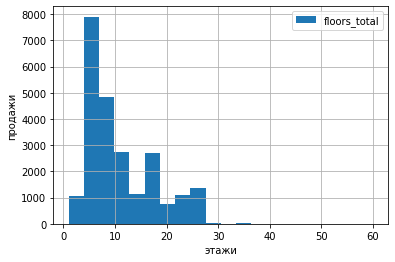

In [28]:
data.plot(y='floors_total', kind='hist',bins=20, range=(1,60), grid = True)
#строим гистограмму
plt.xlabel('этажи')
plt.ylabel('продажи')
plt.show()

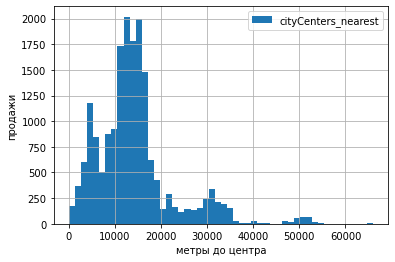

In [29]:
data.plot(y='cityCenters_nearest', kind='hist',bins=50, range=(0,66000), grid = True)
#строим гистограмму
plt.xlabel('метры до центра')
plt.ylabel('продажи')
plt.show()

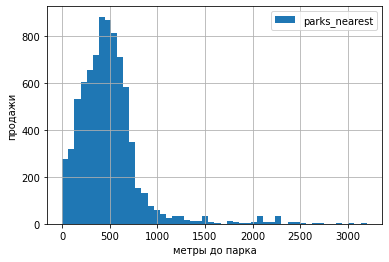

In [30]:
data.plot(y='parks_nearest', kind='hist',bins=50, range=(0,3200), grid = True)
#строим гистограмму
plt.xlabel('метры до парка')
plt.ylabel('продажи')
plt.show()

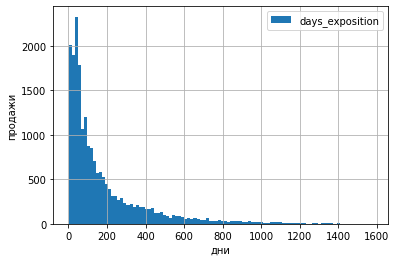

In [31]:
data.plot(y='days_exposition', kind='hist',bins=100, range=(1,1580), grid = True)

plt.xlabel('дни')
plt.ylabel('продажи')
plt.show()

**Промежуточный вывод**  

Необычно быстрыми можно считать продажи, близкие к нулю. Вероятно, на эту квартиру были очереди из покупателей и за один день была оформлена сделка и внесены деньги. Или же большое количество квартир купила какая-то организация, например, под хостелы.  
  
Необычно долгими можно считать продажи, которые длились больше 800 дней. Вероятно, такие квартиры имели скверную репутацию (заражение насекомыми, неисправности в самом доме по воде и свету), крайне неудобное расположение или слишком придирчивых продавцов.

**Корреляционный анализ**

In [32]:
data_mean=data['days_exposition'].mean()
#Ищу среднее значение
data_mean

180.88864

In [33]:
data_median=data['days_exposition'].median()
#Ищу медиану
data_median

95.0

In [34]:
data['last_price'].corr(data['total_area']) 
#Ищу корреляцию

0.6536750582766911

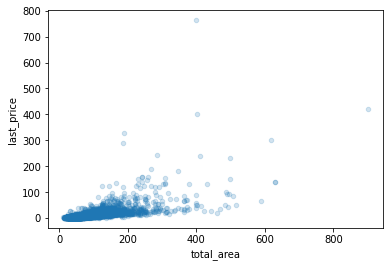

In [35]:
price_corr1 = data.pivot_table(index='last_price', values='total_area', aggfunc='corr')
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2)
plt.show()
#Строю точечный график

In [36]:
data['last_price'].corr(data['living_area']) #Ищу корреляцию

0.4950495706121408

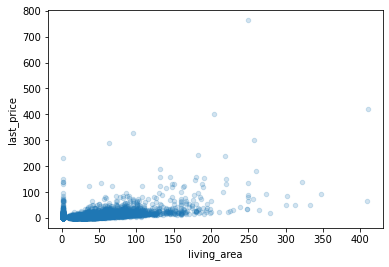

In [37]:
price_corr2 = data.pivot_table(index='last_price', values='living_area', aggfunc='corr')
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)
plt.show()
#Строю точечный график

In [38]:
data['last_price'].corr(data['kitchen_area'])#Ищу корреляцию

0.432333918559586

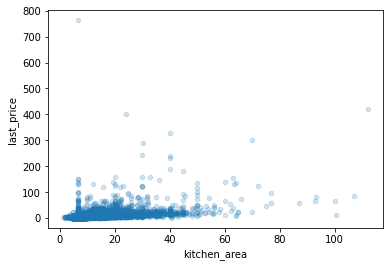

In [39]:
price_corr3 = data.pivot_table(index='last_price', values='kitchen_area', aggfunc='corr')
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)
plt.show()
#Строю точечный график

In [40]:
data['last_price'].corr(data['rooms'])#Ищу корреляцию

0.3633428499648948

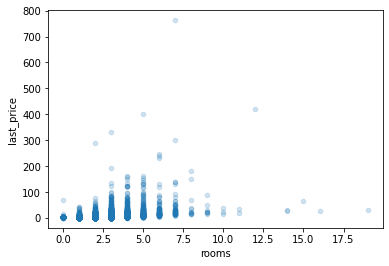

In [41]:
price_corr4 = data.pivot_table(index='last_price', values='rooms', aggfunc='corr')
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2)
plt.show()
#Строю точечный график

**Визуализация**

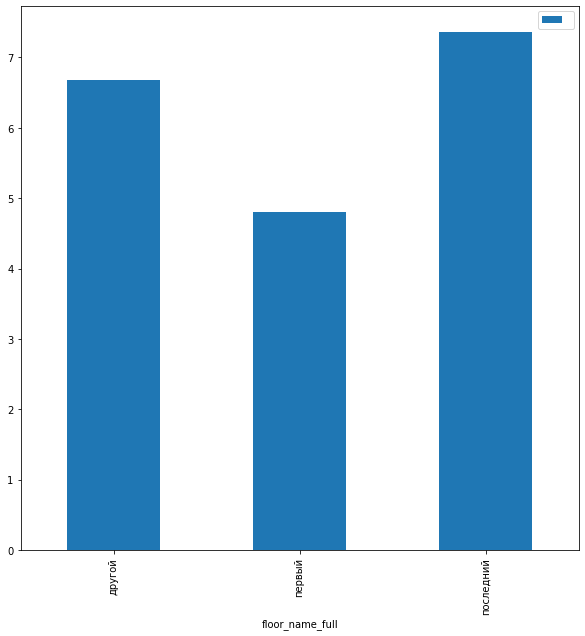

In [42]:
price_corr5=data.pivot_table(index='floor_name_full', values='last_price',aggfunc='mean')
price_corr5.plot(y='last_price', kind='bar', label='', figsize=(10,10));
#Строю столбчатую диаграмму

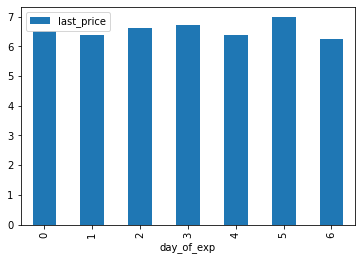

In [43]:
data.pivot_table(index='day_of_exp', values='last_price', aggfunc='mean').plot.bar()
plt.show()
#Строю столбчатую диаграмму

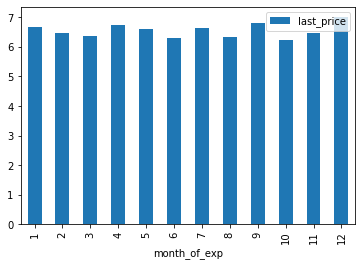

In [44]:
data.pivot_table(index='month_of_exp', values='last_price', aggfunc='mean').plot.bar()
plt.show()
#Строю столбчатую диаграмму

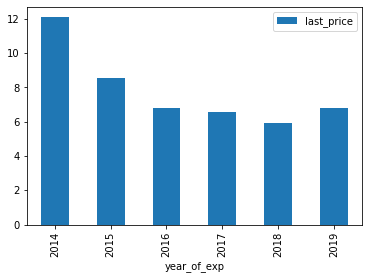

In [45]:
data.pivot_table(index='year_of_exp', values='last_price', aggfunc='mean').plot.bar()
plt.show()
#Строю столбчатую диаграмму

**Промежуточный вывод**    
Корреляция цены и фактора была везде, максимальная при бОльшей общей площади, а минимальная с кухней. Самый дорогой этаж - последний, а самое дорогое время для покупки - суббота, в декабре, в 2014 году. 

In [46]:
data['price_mean']=data['last_price']/data['total_area']
#Ищу среднюю цену, создаю столбец
data_price_mean=data.pivot_table(index='locality_name', values='price_mean', aggfunc='count')
data_price_mean=data_price_mean.sort_values(by='price_mean', ascending=False)
data_price_mean.head(10)
#Создаю сводную таблицу с сортировкой по средней цене

,price_mean
locality_name,
санкт-петербург,15721
поселок мурино,556
поселок шушары,440
всеволожск,398
пушкин,369
колпино,338
поселок парголово,327
гатчина,307
деревня кудрово,299


**Промежуточный вывод**  

Санкт-Петербург - наиболее дорогой город с точки зрения квадратного метра, что неудивительно, ведь там есть вся необходимая инфраструктура, там могут расположиться любые возраста, так как есть чем заняться и взрослым, и детям, и молодежи.  

Выборг занимает последнее место в списке - это пригород Петербурга, и стоимость может быть такой низкой из-за того, что там начинают заселение новостроек, которые находятся далековато от центра культурной столицы. Из-за перенаселения в самом городе жителей стимулируют расположиться на окраинах.

In [47]:
data_spb=data.query('locality_name in "санкт-петербург"')
#добавляю условие в дф
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_exp,month_of_exp,year_of_exp,floor_name_full,cityCenters_nearest_km,price_mean
0,20,13.000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой,16.0,0.120370
2,10,5.196,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой,14.0,0.092786
3,0,64.900,159.000000,2015-07-24,3,2.65,14.0,1.770000,9,False,False,False,6.58,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,другой,7.0,0.408176
4,2,10.000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0,0.100000
7,5,7.915,71.599998,2019-04-18,2,2.65,24.0,1.770000,22,False,False,False,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.703125,3,4,2019,другой,12.0,0.110545


In [48]:
data_new=data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
data_new_sorted=data_new.sort_values(by='cityCenters_nearest_km', ascending=False)
#Создаю сводную таблицу с сортировкой по километражу от города
data_new_sorted

,last_price
cityCenters_nearest_km,
29.0,4.236667
28.0,5.026429
27.0,8.300000
26.0,3.973013
25.0,4.052840
24.0,3.854430
23.0,4.985376
22.0,5.415524
21.0,5.493469


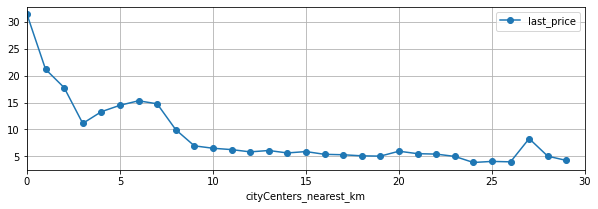

In [49]:
data_new.plot(y='last_price', style='o-', xlim=(0, 30), grid=True, figsize=(10,3)) 
#Строю линейный график с маркерами
plt.show()

**Промежуточный вывод**  
Построен график изменения средней цены для каждого километра от центра Петербурга. 

## Выводы

**1.** На входе нам дали данные, которые содержат 23699 строк.В них встречались дубликаты, аномалии, пропуски, для чего потребовалась предобработка данных. Также не везде был проставлен тип значений, применимый для дальнейшего анализа.  

**2.** Предобработка была выполнена успешно.
В предобработке данных мы увидели в столбцах много пропущенных значений, в некоторых из них пропуски составляли более 80%! Часть из них мы обработали медианными значениями, такие как общее кол-во этажей, высоту потолков, и жилую площадь, а часть (столбцы, котоые указывали на категории)с помощью категориальных значений, такие как вид жилья. Далее мы изменили тип данных для столбцов, содержащих дату и время для дальнейшего анализа.
Затем мы проработали дубликаты - привели значения к единому виду и отображению.
Однако многие строки с пропусками пришлось и удалить, так в нас осталось 23697 строк  

**3.** После этого нам понадобилось добавить новые столбцы- цена за метр, а также отдельно месяц, число и день объявления. Чтобы анализ зависимости продажи от этажей был более нагляден мы создали столбец с категориями, которые выделили первый этаж, последний, и этажи между ними.  

**4.** Далее мы приступили к анализу данных. Тут мы столкнулись с аномалиями, например, высота потолков в некоторых объектах достигала 100 и 20 метров, что маловероятно корректно.
После этого мы создали визуализации, которые помогли понять зависимость продаж от разных факторов:  

-Общий метраж
-Метраж жилой площади
-Площадь кухни
-Цена недвижимости
-Количество комнат
-Высота потолков
-Этаж
-Общее кол-во этажей в доме
-Ближайшая инфраструктура
-Аномалии были везде.Необычно быстрыми можно считать продажи, близкие к нулю. Необычно долгими можно считать продажи, которые длились больше 800 дней. 

 Затем мы вывели корреляцию между факторами и ценой на жильё. Наименьшая корреляция была между ценой и комнатами, всего 0,36, а самая высокая между ценой и общей площадью - 0.65. Самый дорогой этаж - последний. Самые высокие цены были в субботу, в декабре, в 2014 году. Санкт- Петербург наиболее дорогой город с точки зрения квадратного метра (15721), а Выборг самый дешевый(237).Это можно объяснить минимальной инфраструктурой.  
 
Далее мы вывели самые дорогие квадратные метры по городам, это помогло нам сделать выводы о трендах продаж недвижимости. Раз наиболее продаваемые объекты оказались в Санкт-Петербурге, мы подробнее изучили, насколько аудитории интересно расположение до центра, как оказалось, это ключевой фактор при выборе квартир в культурной столице.Если взглянуть ближе на Петербург, то километраж от центра города сильно влиял на цену. Стоимость вдаль понижалась в 6 раз с 30 до 6 миллионов!